<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><br>Cat-Dog Classification Project<br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

# Import Libraries and Export Images from Zip_File

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/cat_dog_data.zip ','r')
zip_ref.extractall()
zip_ref.close()

In [4]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

In [5]:
my_data_dir = "data"


In [9]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['validation', 'test', 'train']

In [10]:
validation_path = my_data_dir + '/validation/'
train_path = my_data_dir + '/train/'
test_path = my_data_dir + '/test/'

In [11]:
os.listdir(validation_path)

['dog', 'cat']

In [12]:
os.listdir(train_path)

['dog', 'cat']

In [13]:
classes = os.listdir(train_path)
classes

['dog', 'cat']

In [14]:
import pathlib

data_dir = pathlib.Path(train_path) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['cat' 'dog']


In [15]:
class_names

array(['cat', 'dog'], dtype='<U3')

**Let's check how many images there are.**

In [16]:
os.listdir(train_path+'cat')

['cat.9560.jpg',
 'cat.10959.jpg',
 'cat.2282.jpg',
 'cat.560.jpg',
 'cat.4056.jpg',
 'cat.931.jpg',
 'cat.6286.jpg',
 'cat.3424.jpg',
 'cat.3004.jpg',
 'cat.2751.jpg',
 'cat.4085.jpg',
 'cat.7323.jpg',
 'cat.8753.jpg',
 'cat.7022.jpg',
 'cat.5908.jpg',
 'cat.10917.jpg',
 'cat.8775.jpg',
 'cat.9438.jpg',
 'cat.658.jpg',
 'cat.5708.jpg',
 'cat.8801.jpg',
 'cat.4953.jpg',
 'cat.4676.jpg',
 'cat.12297.jpg',
 'cat.6441.jpg',
 'cat.761.jpg',
 'cat.2900.jpg',
 'cat.10328.jpg',
 'cat.12057.jpg',
 'cat.3514.jpg',
 'cat.10909.jpg',
 'cat.9777.jpg',
 'cat.9587.jpg',
 'cat.4904.jpg',
 'cat.9973.jpg',
 'cat.2570.jpg',
 'cat.7905.jpg',
 'cat.2780.jpg',
 'cat.7432.jpg',
 'cat.3161.jpg',
 'cat.7891.jpg',
 'cat.2491.jpg',
 'cat.3892.jpg',
 'cat.10440.jpg',
 'cat.10843.jpg',
 'cat.5229.jpg',
 'cat.11746.jpg',
 'cat.6958.jpg',
 'cat.783.jpg',
 'cat.683.jpg',
 'cat.8614.jpg',
 'cat.6082.jpg',
 'cat.9011.jpg',
 'cat.8213.jpg',
 'cat.11332.jpg',
 'cat.98.jpg',
 'cat.4303.jpg',
 'cat.229.jpg',
 'cat.6646.jp

In [17]:
len(os.listdir(train_path+'cat')), len(os.listdir(train_path+'dog'))

(12500, 5026)

In [18]:
len(os.listdir(validation_path+'cat')), len(os.listdir(validation_path+'dog'))

(1219, 1071)

In [19]:
# Walk through cell_images directory and list number of files
for dirpath, dirnames, filenames in os.walk(my_data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'data'.
There are 2 directories and 0 images in 'data/validation'.
There are 0 directories and 1071 images in 'data/validation/dog'.
There are 0 directories and 1219 images in 'data/validation/cat'.
There are 0 directories and 6897 images in 'data/test'.
There are 2 directories and 0 images in 'data/train'.
There are 0 directories and 5026 images in 'data/train/dog'.
There are 0 directories and 12500 images in 'data/train/cat'.


**Let's take an example images from both train-cat and train-dog folders to observe process** 

In [20]:
os.listdir(train_path+'cat')[:10]

['cat.9560.jpg',
 'cat.10959.jpg',
 'cat.2282.jpg',
 'cat.560.jpg',
 'cat.4056.jpg',
 'cat.931.jpg',
 'cat.6286.jpg',
 'cat.3424.jpg',
 'cat.3004.jpg',
 'cat.2751.jpg']

In [21]:
os.listdir(train_path+'cat')[10]

'cat.4085.jpg'

In [22]:
cat_path = train_path+'cat'+'/cat.3047.jpg'

In [23]:
imread(cat_path)

array([[[190, 230, 229],
        [156, 198, 196],
        [110, 152, 148],
        ...,
        [ 24,  35,  29],
        [ 24,  35,  29],
        [ 24,  35,  29]],

       [[195, 235, 234],
        [163, 203, 202],
        [115, 157, 153],
        ...,
        [ 24,  35,  29],
        [ 24,  35,  29],
        [ 24,  35,  29]],

       [[203, 242, 241],
        [174, 214, 213],
        [123, 165, 161],
        ...,
        [ 25,  36,  30],
        [ 24,  35,  29],
        [ 24,  35,  29]],

       ...,

       [[ 93,  83,  32],
        [ 78,  68,  17],
        [ 91,  81,  30],
        ...,
        [130, 123,  71],
        [124, 117,  65],
        [121, 114,  62]],

       [[110, 100,  47],
        [ 81,  71,  18],
        [ 92,  82,  31],
        ...,
        [133, 126,  74],
        [127, 120,  68],
        [124, 117,  65]],

       [[127, 117,  64],
        [ 86,  76,  23],
        [ 94,  84,  31],
        ...,
        [135, 128,  76],
        [130, 123,  71],
        [127, 120,  68]]

In [24]:
cat_im= imread(cat_path)

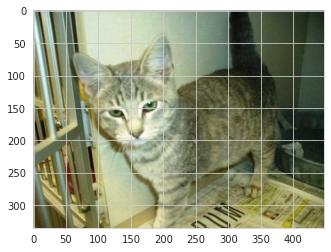

In [25]:
plt.imshow(cat_im);

In [26]:
cat_im.shape

(335, 448, 3)

In [27]:
os.listdir(train_path+'dog')[:10]

['dog.11695.jpg',
 'dog.10848.jpg',
 'dog.12336.jpg',
 'dog.12349.jpg',
 'dog.10031.jpg',
 'dog.2818.jpg',
 'dog.12097.jpg',
 'dog.1430.jpg',
 'dog.12124.jpg',
 'dog.2272.jpg']

In [28]:
os.listdir(train_path+'dog')[10]

'dog.1298.jpg'

In [29]:
dog_path = train_path+'dog'+'/dog.1363.jpg'

In [30]:
imread(dog_path)

array([[[ 63,  75,  65],
        [ 59,  69,  60],
        [ 56,  63,  55],
        ...,
        [120, 159, 166],
        [129, 168, 175],
        [124, 163, 170]],

       [[ 72,  84,  74],
        [ 62,  72,  63],
        [ 54,  61,  53],
        ...,
        [112, 151, 150],
        [114, 153, 152],
        [119, 158, 157]],

       [[ 80,  92,  82],
        [ 64,  74,  65],
        [ 53,  60,  52],
        ...,
        [113, 147, 133],
        [116, 150, 136],
        [115, 149, 135]],

       ...,

       [[175, 158, 130],
        [174, 157, 129],
        [173, 156, 128],
        ...,
        [220, 190, 156],
        [216, 186, 152],
        [212, 182, 148]],

       [[174, 157, 129],
        [173, 156, 128],
        [172, 155, 127],
        ...,
        [223, 193, 159],
        [217, 187, 153],
        [212, 182, 148]],

       [[175, 158, 130],
        [173, 156, 128],
        [172, 155, 127],
        ...,
        [222, 192, 158],
        [219, 189, 155],
        [216, 186, 152]]

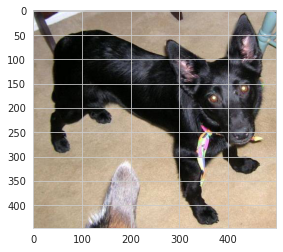

In [31]:
dog_im = imread(dog_path)
plt.imshow(dog_im);

In [32]:
dog_im.shape

(447, 500, 3)

In [33]:
# View a random image
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (375, 499, 3)


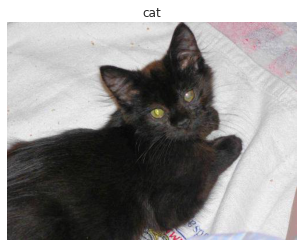

In [34]:
img = view_random_image(target_dir=train_path,
                        target_class="cat")

Image shape: (374, 500, 3)


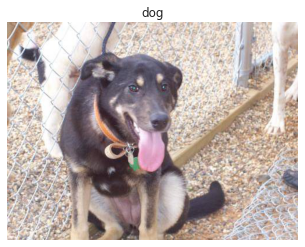

In [35]:
img = view_random_image(target_dir=train_path,
                        target_class="dog")

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [36]:
cat_im.shape

(335, 448, 3)

In [37]:
dog_im.shape

(447, 500, 3)

In [38]:
x = [imread(train_path+'dog/'+image).shape[0] for image in os.listdir(train_path+'dog') if 'Thumbs.db' not in image]
y = [imread(train_path+'dog/'+image).shape[1] for image in os.listdir(train_path+'dog') if 'Thumbs.db' not in image]

In [39]:
x[:5]

[374, 395, 500, 416, 374]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


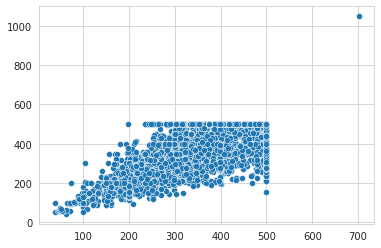

In [40]:
sns.scatterplot(x,y);

In [41]:
np.mean(x), np.median(x)

(365.0505372065261, 374.0)

In [42]:
np.mean(y), np.median(y)

(398.9930362116992, 426.0)

In [43]:
image_shape = (256,256,3)


In [44]:
image_shape[:2]

(256, 256)

## Scalling

**Let's check the images if they are needed to be scaled or not**

In [45]:
dog_im.max()

255

In [46]:
cat_im.max()

255

As we see above, images need to be scaled

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [48]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

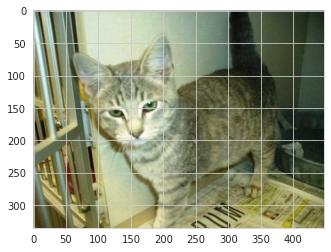

In [49]:
plt.imshow(cat_im);

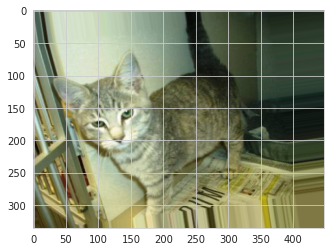

In [50]:
plt.imshow(datagen.random_transform(cat_im));

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [51]:
datagen.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


In [52]:
datagen.flow_from_directory(validation_path)

Found 2290 images belonging to 2 classes.


In [53]:
batch_size=32

In [54]:
train_image_gen = datagen.flow_from_directory(directory=train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=True)

Found 17526 images belonging to 2 classes.


In [55]:
validation_image_gen = datagen.flow_from_directory(directory=validation_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2290 images belonging to 2 classes.


In [56]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [57]:
validation_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [58]:
validation_image_gen

In [59]:
train_image_gen[0]

(array([[[[0.48378533, 0.49555004, 0.523001  ],
          [0.42083937, 0.43260407, 0.46005505],
          [0.35789347, 0.36965817, 0.39710915],
          ...,
          [0.29109338, 0.23241937, 0.22095376],
          [0.30944854, 0.2538337 , 0.24848649],
          [0.35830635, 0.3080971 , 0.3065219 ]],
 
         [[0.50121164, 0.51297635, 0.5404273 ],
          [0.49978107, 0.5115458 , 0.53899676],
          [0.4983505 , 0.51011515, 0.5375661 ],
          ...,
          [0.30092737, 0.24389239, 0.23570478],
          [0.33132273, 0.27827308, 0.2752777 ],
          [0.3853009 , 0.33836964, 0.33843344]],
 
         [[0.21350308, 0.22526778, 0.25271878],
          [0.363715  , 0.3754797 , 0.40293068],
          [0.50184685, 0.51361156, 0.54106253],
          ...,
          [0.3107614 , 0.2553654 , 0.2504558 ],
          [0.36246374, 0.31269214, 0.3113357 ],
          [0.30990684, 0.2662536 , 0.2679564 ]],
 
         ...,
 
         [[0.05384712, 0.01950858, 0.03481015],
          [0.07298

In [60]:
train_image_gen[0][0].shape

(32, 256, 256, 3)

In [61]:
train_image_gen[0][0][0].shape

(256, 256, 3)

In [62]:
len(train_image_gen), len(validation_image_gen)

(548, 72)

In [63]:
len(train_image_gen)*batch_size, len(validation_image_gen)*batch_size 

(17536, 2304)

In [64]:
# Get a sample of the training data batch 
images, labels = train_image_gen.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [65]:
# Get a sample of the testing data batch 
images, labels = validation_image_gen.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

# Modelling

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())


model.add(Dense(128))
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

# optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [69]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [70]:
model.fit(train_image_gen,
          epochs=10,
          steps_per_epoch=len(train_image_gen),
          validation_data=validation_image_gen,
          validation_steps=len(validation_image_gen),
          callbacks=[early_stop])

Epoch 1/10
548/548 [==============================] - 337s 587ms/step - loss: 0.6044 - accuracy: 0.7120 - val_loss: 0.7210 - val_accuracy: 0.5323
Epoch 2/10
548/548 [==============================] - 318s 580ms/step - loss: 0.5805 - accuracy: 0.7127 - val_loss: 0.7124 - val_accuracy: 0.5323
Epoch 3/10
548/548 [==============================] - 317s 579ms/step - loss: 0.5669 - accuracy: 0.7165 - val_loss: 0.8306 - val_accuracy: 0.5454
Epoch 4/10
548/548 [==============================] - 319s 582ms/step - loss: 0.5556 - accuracy: 0.7285 - val_loss: 0.6567 - val_accuracy: 0.6297
Epoch 5/10
548/548 [==============================] - 318s 579ms/step - loss: 0.5362 - accuracy: 0.7448 - val_loss: 0.6501 - val_accuracy: 0.6223
Epoch 6/10
548/548 [==============================] - 317s 578ms/step - loss: 0.5121 - accuracy: 0.7559 - val_loss: 0.6022 - val_accuracy: 0.6629
Epoch 7/10
548/548 [==============================] - 317s 578ms/step - loss: 0.4863 - accuracy: 0.7743 - val_loss: 0.5742 -

In [71]:
model.metrics_names

['loss', 'accuracy']

In [72]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.604,0.712,0.721,0.532
1,0.580,0.713,0.712,0.532
2,0.567,0.717,0.831,0.545
3,0.556,0.729,0.657,0.630
4,0.536,0.745,0.650,0.622


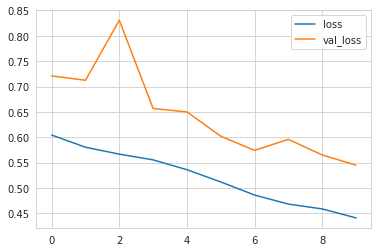

In [73]:
summary[["loss", "val_loss"]].plot();

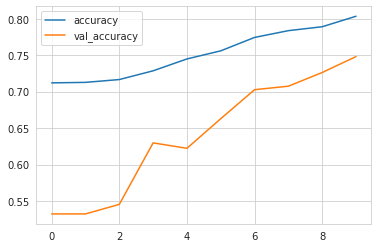

In [74]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
score = model.evaluate(validation_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

72/72 [==============================] - 37s 508ms/step - loss: 0.5404 - accuracy: 0.7502
Test loss: 0.5404309034347534
Test accuracy: 0.7502183318138123


In [77]:
pred_prob = model.predict(validation_image_gen)

In [78]:
pred_prob

array([[0.06806242],
       [0.11666641],
       [0.1661942 ],
       ...,
       [0.90917397],
       [0.89978504],
       [0.9936778 ]], dtype=float32)

In [79]:
y_pred = pred_prob > 0.5

In [80]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [81]:
y_test = validation_image_gen.classes
y_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.92      0.79      1219
           1       0.85      0.55      0.67      1071

    accuracy                           0.75      2290
   macro avg       0.78      0.74      0.73      2290
weighted avg       0.77      0.75      0.74      2290



In [83]:
confusion_matrix(y_test, y_pred)

array([[1116,  103],
       [ 477,  594]])

# Prediction

In [90]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [91]:
random_image = random.sample(os.listdir(test_path), 1)
random_image

['6797.jpg']

In [92]:
image_path = test_path + random_image[0]
image_path

'data/test/6797.jpg'

In [93]:
my_image = image.load_img(image_path, target_size=image_shape)

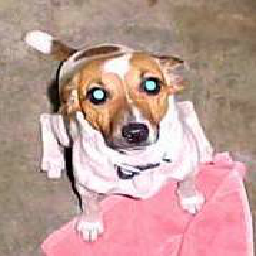

In [94]:
my_image

In [95]:
type(my_image)

PIL.Image.Image

In [96]:
#my_image = np.array(my_image)
my_image = image.img_to_array(my_image)

In [97]:
my_image.shape

(256, 256, 3)

In [98]:
my_image = np.expand_dims(my_image, axis=0)

In [99]:
my_image.shape

(1, 256, 256, 3)

In [100]:
model.predict(my_image)

array([[0.99999034]], dtype=float32)

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>